<a href="https://colab.research.google.com/github/Dulavinya/EN3160-ImageProcessing/blob/main/A01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()


Saving a1images.zip to a1images.zip


In [4]:
import zipfile
import os

# Replace 'images.zip' with your actual zip file name
zip_file = "a1images.zip"

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall("images")  # Extract to folder named "images"

# Optional: list files extracted
print("Files extracted to 'images/':", os.listdir("images"))


Files extracted to 'images/': ['a1images']


In [12]:
import os

# List the files to confirm
print(os.listdir("images/a1images"))



['emma.jpg', 'einstein.png', 'daisy.jpg', 'spider.png', 'jeniffer.jpg', 'highlights_and_shadows.jpg', 'shells.tif', 'brain_proton_density_slice.png', 'a1q5images']


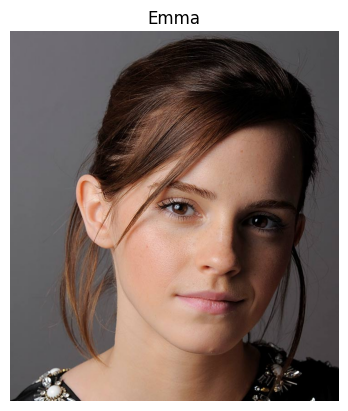

In [13]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Now load the image from the extracted folder
img = cv.imread("images/a1images/emma.jpg", cv.IMREAD_UNCHANGED)


if img is None:
    raise FileNotFoundError("Image not found. Check path and filename.")

# Display the image
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Emma")
plt.show()
